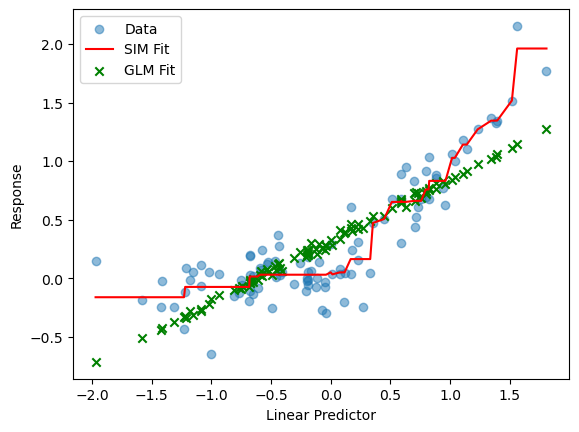

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.isotonic import IsotonicRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate sample data
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)
alpha_0_true = np.array([2, -2])
ridge_func = np.vectorize(lambda x: max(0, x))  # Example ridge function
Y = ridge_func(X.dot(alpha_0_true)) + np.random.normal(scale=0.2, size=n)

# Estimate alpha_0 using PCA for SIM
pca = PCA(n_components=1)
alpha_0_estimated = pca.fit(X).components_[0]

# Ensure the sign of estimated alpha_0 is consistent with true alpha_0
if np.dot(alpha_0_true, alpha_0_estimated) < 0:
    alpha_0_estimated = -alpha_0_estimated

# Fit isotonic regression for the estimated alpha_0 for SIM
linear_predictor = X.dot(alpha_0_estimated)
iso_reg = IsotonicRegression(increasing=True)
Y_pred_SIM = iso_reg.fit_transform(linear_predictor, Y)

# Fit GLM (Linear Regression in this case)
X_glm = sm.add_constant(X)  # Add intercept
glm_model = sm.GLM(Y, X_glm).fit()
Y_pred_GLM = glm_model.predict(X_glm)


projected_X = X.dot(alpha_0_true)


# Visualization
plt.scatter(projected_X, Y, label="Data", alpha=0.5)
#sorted_indices = np.argsort(linear_predictor)
sorted_indices = np.argsort(projected_X)
plt.plot(projected_X[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
plt.scatter(projected_X, Y_pred_GLM, color='green', marker='x', label="GLM Fit")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.legend()
plt.show()


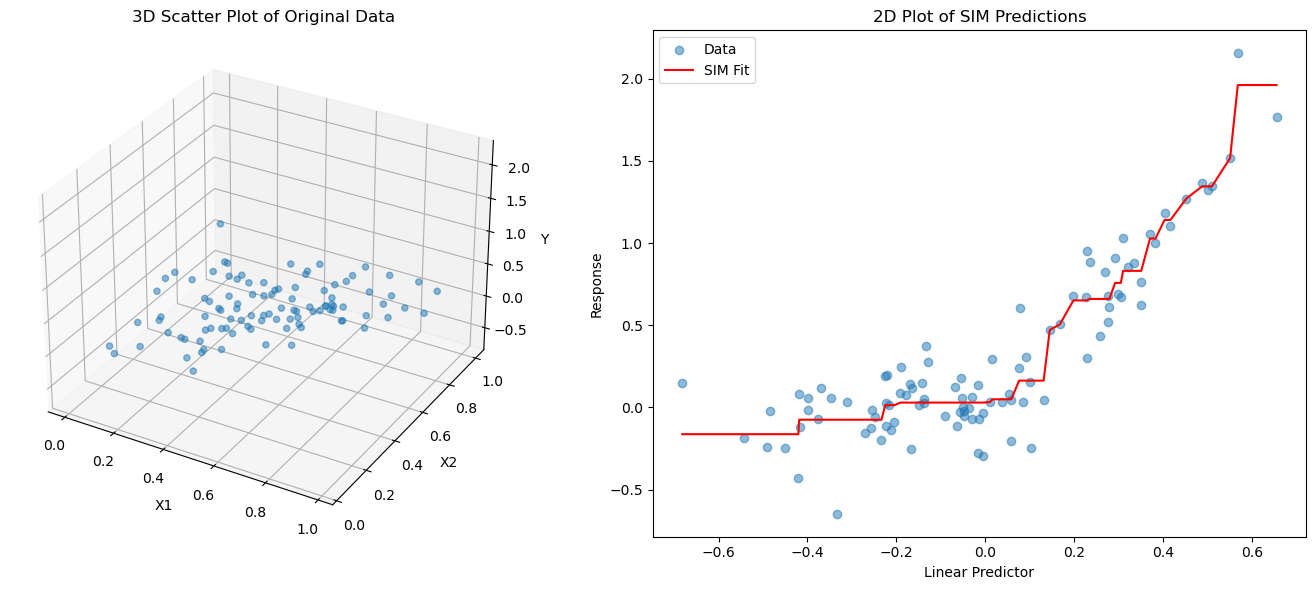

In [9]:
# Visualization with 3D Scatter Plot for Original Data and 2D Plots for Predictions

# 3D Scatter Plot for Original Data
fig = plt.figure(figsize=(14, 6))

# 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], Y, label="Original Data", alpha=0.5)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title("3D Scatter Plot of Original Data")

# 2D Plot for Isotonic Regression Predictions
ax2 = fig.add_subplot(122)
ax2.scatter(linear_predictor, Y, label="Data", alpha=0.5)
sorted_indices = np.argsort(linear_predictor)
ax2.plot(linear_predictor[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
ax2.set_xlabel("Linear Predictor")
ax2.set_ylabel("Response")
ax2.set_title("2D Plot of SIM Predictions")
ax2.legend()

plt.tight_layout()
plt.show()


In [6]:
alpha_0_estimated

array([ 0.72221187, -0.6916719 ])

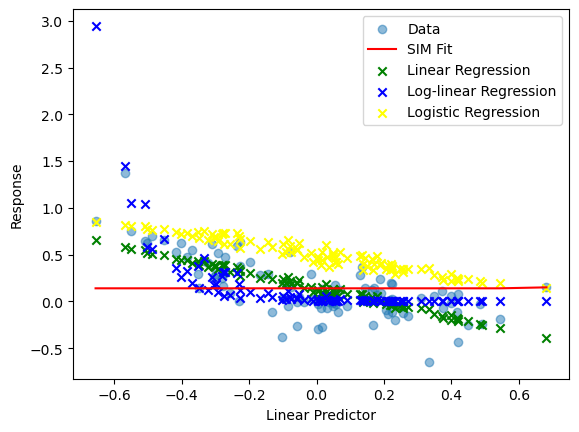

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)
alpha_0_true = np.array([1, -1])
ridge_func = np.vectorize(lambda x: max(0, x))
Y = ridge_func(X.dot(alpha_0_true)) + np.random.normal(scale=0.2, size=n)

# Estimate alpha_0 using PCA for SIM
pca = PCA(n_components=1)
alpha_0_estimated = pca.fit(X).components_[0]
linear_predictor = X.dot(alpha_0_estimated)

# Fit isotonic regression for SIM
iso_reg = IsotonicRegression(increasing=True)
Y_pred_SIM = iso_reg.fit_transform(linear_predictor, Y)

# Fit GLM with Gaussian family (Linear Regression)
lin_reg = LinearRegression().fit(X, Y)
Y_pred_linear = lin_reg.predict(X)

# Fit GLM with Poisson family (Log-linear Regression)
poisson_model = sm.GLM(Y, sm.add_constant(X), family=sm.families.Poisson()).fit()
Y_pred_poisson = poisson_model.predict(sm.add_constant(X))

# Fit GLM with Binomial family (Logistic Regression)
# Convert Y to binary for demonstration
Y_bin = (Y > np.median(Y)).astype(int)
logistic_model = LogisticRegression().fit(X, Y_bin)
Y_pred_logistic = logistic_model.predict_proba(X)[:, 1]

# Visualization
plt.scatter(linear_predictor, Y, label="Data", alpha=0.5)
sorted_indices = np.argsort(linear_predictor)
plt.plot(linear_predictor[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
plt.scatter(linear_predictor, Y_pred_linear, color='green', marker='x', label="Linear Regression")
plt.scatter(linear_predictor, Y_pred_poisson, color='blue', marker='x', label="Log-linear Regression")
plt.scatter(linear_predictor, Y_pred_logistic, color='yellow', marker='x', label="Logistic Regression")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.legend()
plt.show()


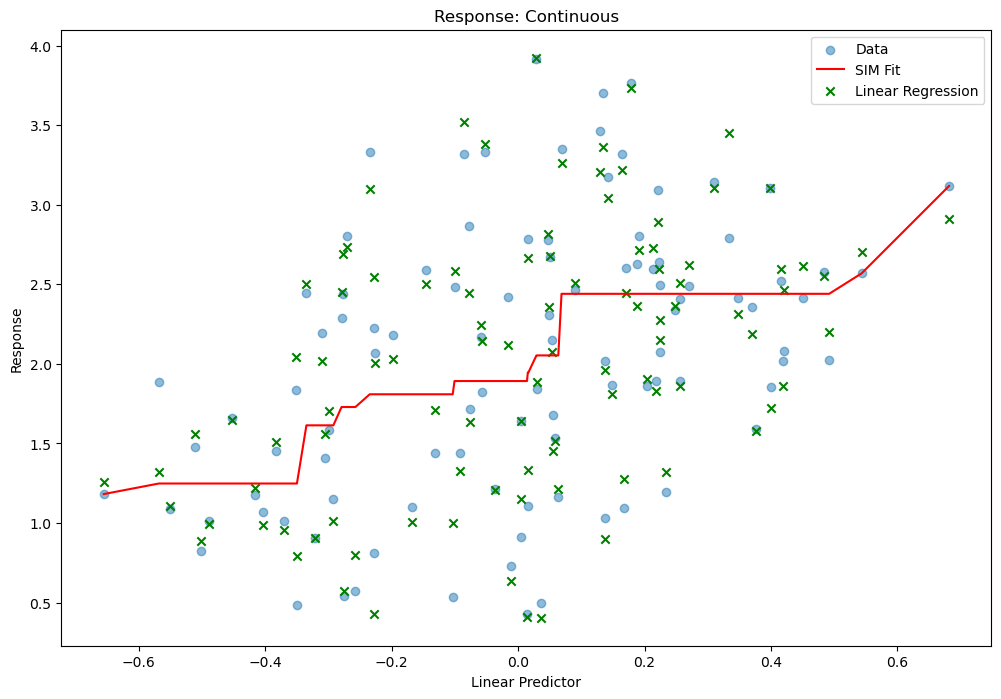

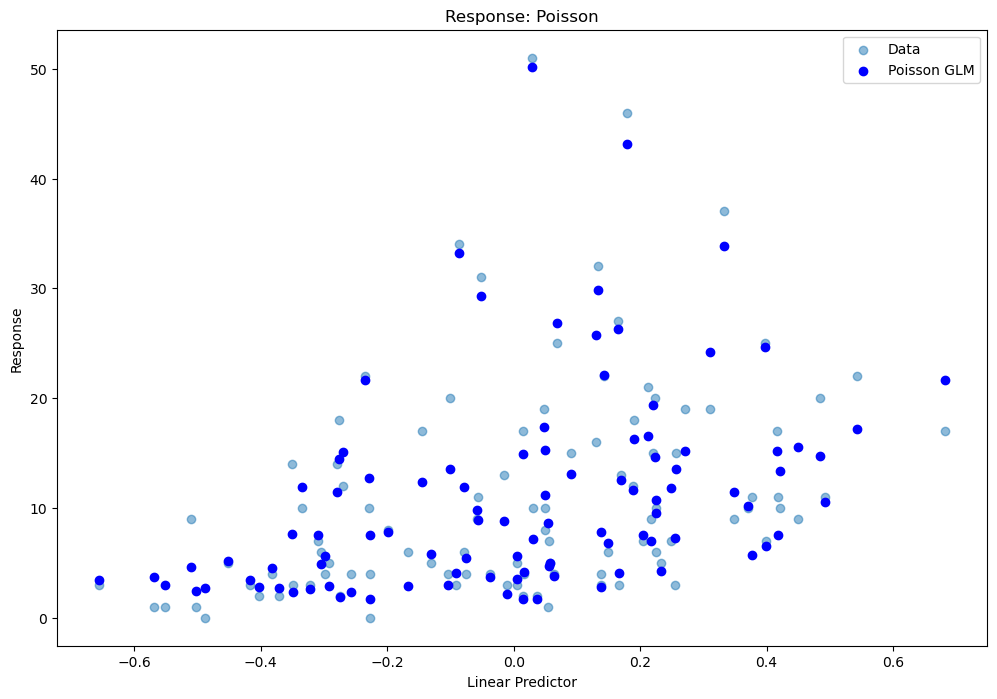

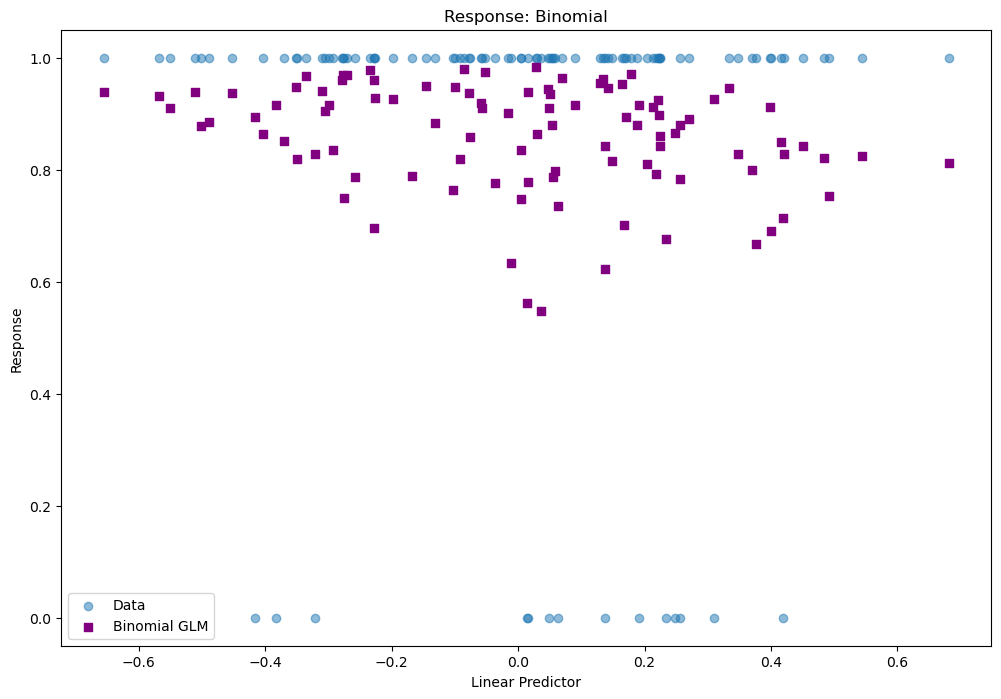

In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)
alpha_0_true = np.array([1, -1])
ridge_func = np.vectorize(lambda x: max(0, x))  # Example ridge function
Y_continuous = ridge_func(X.dot(alpha_0_true)) + np.random.normal(scale=0.2, size=n)
Y_poisson = np.random.poisson(np.exp(X.dot(alpha_0_true)))
Y_binomial = (np.random.rand(n) < 1 / (1 + np.exp(-X.dot(alpha_0_true)))).astype(int)

# Estimate alpha_0 using PCA for SIM
pca = PCA(n_components=1)
alpha_0_estimated = pca.fit(X).components_[0]

# Ensure the sign of estimated alpha_0 is consistent with true alpha_0
if np.dot(alpha_0_true, alpha_0_estimated) < 0:
    alpha_0_estimated = -alpha_0_estimated

# Fit isotonic regression for the estimated alpha_0 for SIM
linear_predictor = X.dot(alpha_0_estimated)
iso_reg = IsotonicRegression(increasing=True)
Y_pred_SIM = iso_reg.fit_transform(linear_predictor, Y_continuous)

# Fit Linear Regression (Gaussian family with identity link)
lin_reg = LinearRegression().fit(X, Y_continuous)
Y_pred_linear = lin_reg.predict(X)

# Fit Poisson GLM (Poisson family with log link)
poisson_glm = sm.GLM(Y_poisson, sm.add_constant(X), family=sm.families.Poisson()).fit()
Y_pred_poisson = poisson_glm.predict(sm.add_constant(X))

# Fit Binomial GLM (Binomial family with logit link)
binomial_glm = sm.GLM(Y_binomial, sm.add_constant(X), family=sm.families.Binomial()).fit()
Y_pred_binomial = binomial_glm.predict(sm.add_constant(X))

# Visualization for Continuous Y
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y_continuous, label="Data", alpha=0.5)
sorted_indices = np.argsort(linear_predictor)
plt.plot(linear_predictor[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
plt.scatter(linear_predictor, Y_pred_linear, color='green', marker='x', label="Linear Regression")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.title("Response: Continuous")
plt.legend()
plt.show()

# Visualization for Poisson Y
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y_poisson, label="Data", alpha=0.5)
plt.scatter(linear_predictor, Y_pred_poisson, color='blue', marker='o', label="Poisson GLM")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.title("Response: Poisson")
plt.legend()
plt.show()

# Visualization for Binomial Y
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y_binomial, label="Data", alpha=0.5)
plt.scatter(linear_predictor, Y_pred_binomial, color='purple', marker='s', label="Binomial GLM")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.title("Response: Binomial")
plt.legend()
plt.show()


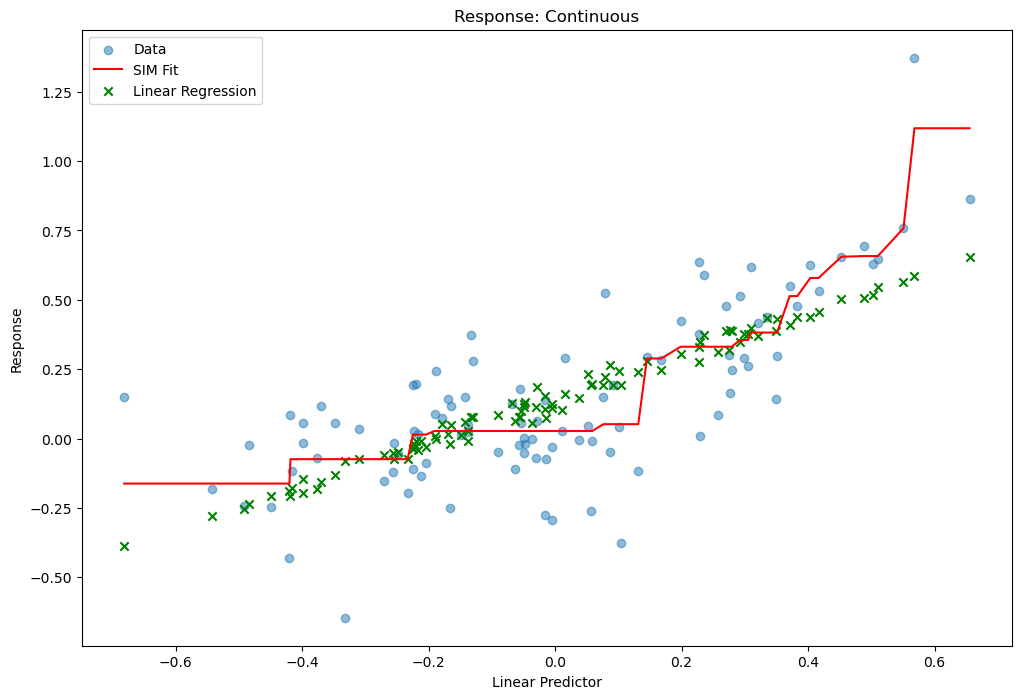

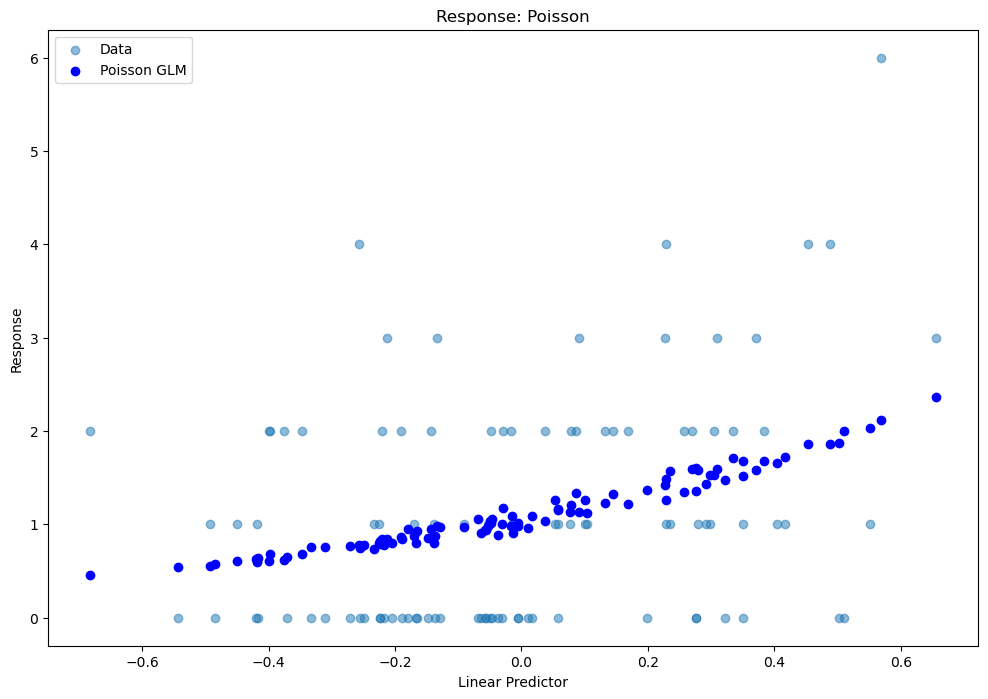

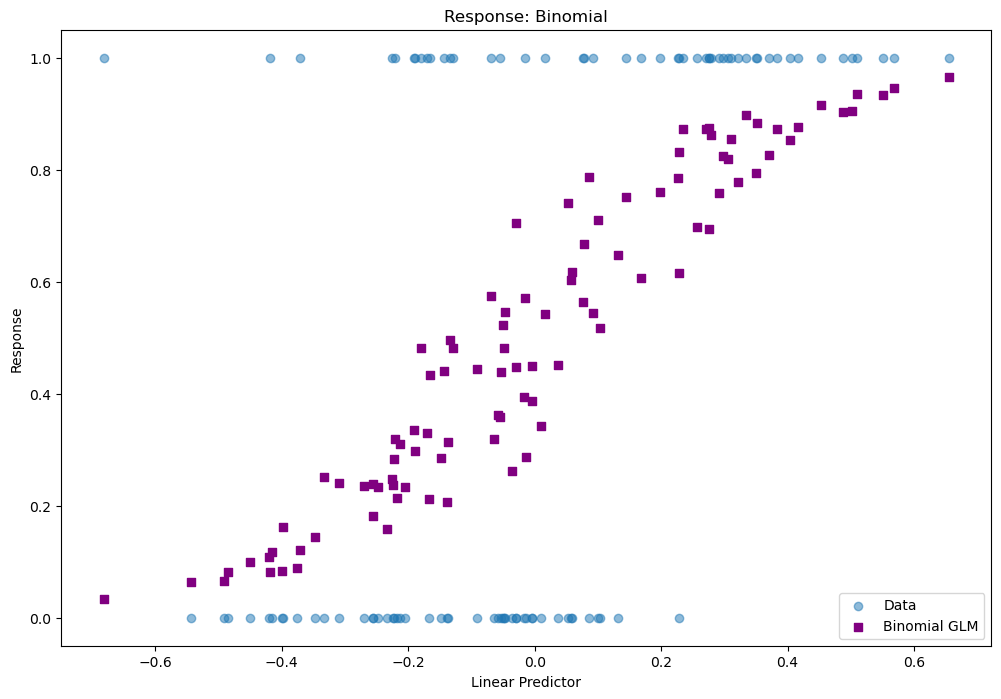

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)
alpha_0_true = np.array([1, -1])
ridge_func = np.vectorize(lambda x: max(0, x))  # Example ridge function
Y_continuous = ridge_func(X.dot(alpha_0_true)) + np.random.normal(scale=0.2, size=n)
Y_poisson = np.random.poisson(np.exp(Y_continuous))
Y_binomial = (Y_continuous > np.median(Y_continuous)).astype(int)

# Estimate alpha_0 using PCA for SIM
pca = PCA(n_components=1)
alpha_0_estimated = pca.fit(X).components_[0]

# Ensure the sign of estimated alpha_0 is consistent with true alpha_0
if np.dot(alpha_0_true, alpha_0_estimated) < 0:
    alpha_0_estimated = -alpha_0_estimated

# Fit isotonic regression for the estimated alpha_0 for SIM
linear_predictor = X.dot(alpha_0_estimated)
iso_reg = IsotonicRegression(increasing=True)
Y_pred_SIM = iso_reg.fit_transform(linear_predictor, Y_continuous)

# Fit Linear Regression (Gaussian family with identity link)
lin_reg = LinearRegression().fit(X, Y_continuous)
Y_pred_linear = lin_reg.predict(X)

# Fit Poisson GLM (Poisson family with log link)
poisson_glm = sm.GLM(Y_poisson, sm.add_constant(X), family=sm.families.Poisson()).fit()
Y_pred_poisson = poisson_glm.predict(sm.add_constant(X))

# Fit Binomial GLM (Binomial family with logit link)
binomial_glm = sm.GLM(Y_binomial, sm.add_constant(X), family=sm.families.Binomial()).fit()
Y_pred_binomial = binomial_glm.predict(sm.add_constant(X))

# Visualization for Y_continuous
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y_continuous, label="Data", alpha=0.5)
sorted_indices = np.argsort(linear_predictor)
plt.plot(linear_predictor[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
plt.scatter(linear_predictor, Y_pred_linear, color='green', marker='x', label="Linear Regression")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.title("Response: Continuous")
plt.legend()
plt.show()

# Visualization for Y_poisson
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y_poisson, label="Data", alpha=0.5)
plt.scatter(linear_predictor, Y_pred_poisson, color='blue', marker='o', label="Poisson GLM")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.title("Response: Poisson")
plt.legend()
plt.show()

# Visualization for Y_binomial
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y_binomial, label="Data", alpha=0.5)
plt.scatter(linear_predictor, Y_pred_binomial, color='purple', marker='s', label="Binomial GLM")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.title("Response: Binomial")
plt.legend()
plt.show()


In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)
alpha_0_true = np.array([1, -1])
ridge_func = np.vectorize(lambda x: max(0, x))
Y = ridge_func(X.dot(alpha_0_true)) + np.random.normal(scale=0.2, size=n)

# Estimate alpha_0 using PCA for SIM
pca = PCA(n_components=1)
alpha_0_estimated = pca.fit(X).components_[0]

# Ensure the sign of estimated alpha_0 is consistent with true alpha_0
if np.dot(alpha_0_true, alpha_0_estimated) < 0:
    alpha_0_estimated = -alpha_0_estimated

# Fit isotonic regression for the estimated alpha_0 for SIM
linear_predictor = X.dot(alpha_0_estimated)
iso_reg = IsotonicRegression(increasing=True)
Y_pred_SIM = iso_reg.fit_transform(linear_predictor, Y)

# Fit GLMs with different continuous distributions
# 1. Gaussian
gaussian_glm = sm.GLM(Y, sm.add_constant(X), family=sm.families.Gaussian()).fit()
Y_pred_gaussian = gaussian_glm.predict(sm.add_constant(X))

# 2. Gamma
gamma_glm = sm.GLM(Y, sm.add_constant(X), family=sm.families.Gamma()).fit()
Y_pred_gamma = gamma_glm.predict(sm.add_constant(X))

# 3. Inverse Gaussian
inv_gaussian_glm = sm.GLM(Y, sm.add_constant(X), family=sm.families.InverseGaussian()).fit()
Y_pred_inv_gaussian = inv_gaussian_glm.predict(sm.add_constant(X))

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y, label="Data", alpha=0.5)
sorted_indices = np.argsort(linear_predictor)
plt.plot(linear_predictor[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
plt.scatter(linear_predictor, Y_pred_gaussian, color='green', marker='x', label="Gaussian GLM")
plt.scatter(linear_predictor, Y_pred_gamma, color='blue', marker='o', label="Gamma GLM")
plt.scatter(linear_predictor, Y_pred_inv_gaussian, color='purple', marker='s', label="Inverse Gaussian GLM")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.legend()
plt.show()


/opt/anaconda3/envs/slt-ce/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/opt/anaconda3/envs/slt-ce/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/opt/anaconda3/envs/slt-ce/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/opt/anaconda3/envs/slt-ce/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/opt/anaconda3/envs/slt-ce/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: in

ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)
alpha_0_true = np.array([1, -1])
ridge_func = np.vectorize(lambda x: max(0, x))
Y = ridge_func(X.dot(alpha_0_true)) + np.random.normal(scale=0.2, size=n)

# Estimate alpha_0 using PCA for SIM
pca = PCA(n_components=1)
alpha_0_estimated = pca.fit(X).components_[0]

# Ensure the sign of estimated alpha_0 is consistent with true alpha_0
if np.dot(alpha_0_true, alpha_0_estimated) < 0:
    alpha_0_estimated = -alpha_0_estimated

# Fit isotonic regression for the estimated alpha_0 for SIM
linear_predictor = X.dot(alpha_0_estimated)
iso_reg = IsotonicRegression(increasing=True)
Y_pred_SIM = iso_reg.fit_transform(linear_predictor, Y)

# Fit GLMs with different continuous distributions
# 1. Gaussian
gaussian_glm = sm.GLM(Y, sm.add_constant(X), family=sm.families.Gaussian()).fit()
Y_pred_gaussian = gaussian_glm.predict(sm.add_constant(X))


# 3. Inverse Gaussian
inv_gaussian_glm = sm.GLM(Y, sm.add_constant(X), family=sm.families.InverseGaussian()).fit()
Y_pred_inv_gaussian = inv_gaussian_glm.predict(sm.add_constant(X))

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(linear_predictor, Y, label="Data", alpha=0.5)
sorted_indices = np.argsort(linear_predictor)
plt.plot(linear_predictor[sorted_indices], Y_pred_SIM[sorted_indices], color='red', label="SIM Fit")
plt.scatter(linear_predictor, Y_pred_gaussian, color='green', marker='x', label="Gaussian GLM")
#plt.scatter(linear_predictor, Y_pred_gamma, color='blue', marker='o', label="Gamma GLM")
plt.scatter(linear_predictor, Y_pred_inv_gaussian, color='purple', marker='s', label="Inverse Gaussian GLM")
plt.xlabel("Linear Predictor")
plt.ylabel("Response")
plt.legend()
plt.show()


/opt/anaconda3/envs/slt-ce/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: invalid value encountered in power
  return np.power(z, 1. / self.power)


ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Data Generation
np.random.seed(42)
n = 1000
d = 5
X = np.random.normal(size=(n, d))
alpha_true = np.array([1, 2, 3, 4, 5])
ridge_true = np.dot(X, alpha_true)
Y = ridge_true + 2 * np.sin(ridge_true) + np.random.normal(size=n)

# Single Index Model (SIM)
sim_model = LinearRegression()
sim_model.fit(X, Y)
sim_coef = sim_model.coef_

# Gaussian GLM
exog = sm.add_constant(X)
glm_gaussian = sm.GLM(Y, exog, family=sm.families.Gaussian()).fit()
glm_coef = glm_gaussian.params[1:]

print("SIM Coefficients:", sim_coef)
print("GLM (Gaussian) Coefficients:", glm_coef)


SIM Coefficients: [1.05710644 1.95803329 2.94665737 3.9902066  5.05428268]
GLM (Gaussian) Coefficients: [1.05710644 1.95803329 2.94665737 3.9902066  5.05428268]
